<a href="https://colab.research.google.com/github/vixteraLCX/Predictive-Analysis-on-Healthcare-Products-Fall-2025-DA-Project/blob/main/ARIMA_and_SARIMA_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

from pmdarima import auto_arima

In [155]:
df = pd.read_csv('/content/drive/MyDrive/Predictive-Analysis-on-Healthcare-Products-Data/CombinedHealthcareData.csv')

In [156]:
df.head()

,Date,ActualQuantity,Channel,Customer Country,Customer Desc,Customer Region,Geo Latitude,Geo Longitude,Location,Location Region,Location Type,Product Desc,Material Type,Product Group,Brand ID,Base UOM,Base UOM Desc.
0,2016-01-01,840,US,United States,United States Sales,AMERICAS,37.0902° N,95.7129° W,United States Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
1,2016-01-01,1800,TH,Thailand,Thailand Sales,APAC,15.8700° N,100.9925° E,Thailand Location,APAC,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
2,2016-02-01,900,US,United States,United States Sales,AMERICAS,37.0902° N,95.7129° W,United States Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
3,2016-01-01,957,CA,Canada,Canada Sales,AMERICAS,56.1304° N,106.3468° W,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
4,2017-01-01,1099,CA,Canada,Canada Sales,AMERICAS,56.1304° N,106.3468° W,Canada Location,AMERICAS,Plant,SURFIT NATURA WFR FLEX 70MM (1X10PK),Finished,OSTOMY,NATURA,EA,Each


In [157]:
df.tail()

,Date,ActualQuantity,Channel,Customer Country,Customer Desc,Customer Region,Geo Latitude,Geo Longitude,Location,Location Region,Location Type,Product Desc,Material Type,Product Group,Brand ID,Base UOM,Base UOM Desc.
370,2019-08-01,968,CA,Canada,Canada Sales,AMERICAS,56.1304° N,106.3468° W,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
371,2019-09-01,1088,CA,Canada,Canada Sales,AMERICAS,56.1304° N,106.3468° W,Canada Location,AMERICAS,Plant,SUR-FIT/ACTIVE LIFE TAIL CLSR (1X10PK),Finished,OSTOMY,OTHER ACCESSORIES,EA,Each
372,2019-07-01,999,FR,France,France Sales,EMEA,46.2276° N,2.2137° E,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each
373,2019-08-01,1045,FR,France,France Sales,EMEA,46.2276° N,2.2137° E,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each
374,2019-09-01,1125,FR,France,France Sales,EMEA,46.2276° N,2.2137° E,France Location,EMEA,Plant,ESTEEM SYN+FLX WHT32/35MM PRECUT(1X10),Finished,OSTOMY,ESTEEM SYNERGY,EA,Each


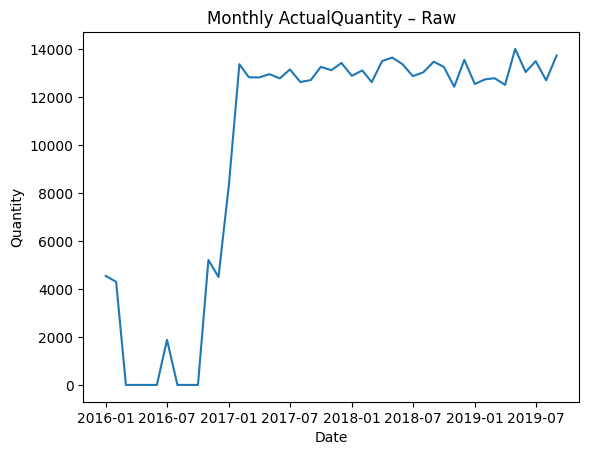

In [158]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
series = df['ActualQuantity'].resample('MS').sum()

plt.figure()
plt.plot(series)
plt.title("Monthly ActualQuantity – Raw")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()


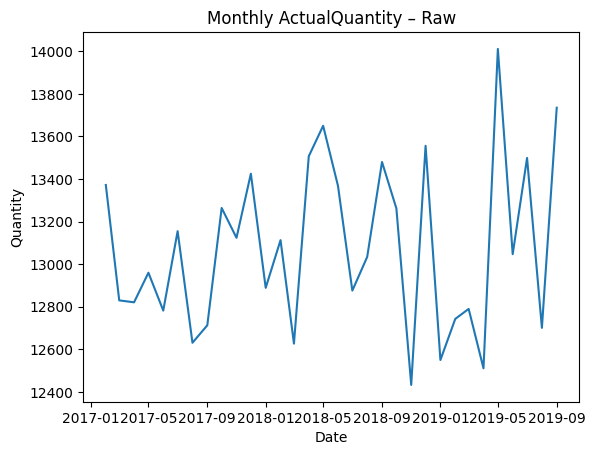

In [159]:
series = series[series.index >= '2017-01-02']

plt.figure()
plt.plot(series)
plt.title("Monthly ActualQuantity – Raw")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.show()



In [160]:
auto_model = auto_arima(
    series,
    seasonal=True,
    m=12,
    trace=True,
    stepwise=True
)

print(auto_model.summary())
print(auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=308.322, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=311.124, Time=0.33 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=311.421, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=306.481, Time=0.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=309.950, Time=0.15 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=310.184, Time=0.06 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=309.796, Time=0.08 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=309.820, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=311.835, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12]          
Total fit time: 2.681 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   32

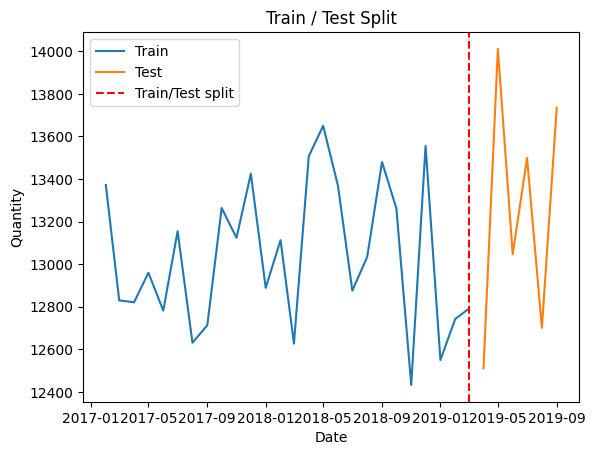

                               SARIMAX Results                                
Dep. Variable:         ActualQuantity   No. Observations:                   26
Model:                          ARIMA   Log Likelihood                -188.245
Date:                Tue, 09 Dec 2025   AIC                            380.490
Time:                        07:36:55   BIC                            383.006
Sample:                    02-01-2017   HQIC                           381.214
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.304e+04     67.001    194.575      0.000    1.29e+04    1.32e+04
sigma2      1.141e+05   4.86e+04      2.350      0.019    1.89e+04    2.09e+05
Ljung-Box (L1) (Q):                   0.13   Jarque-

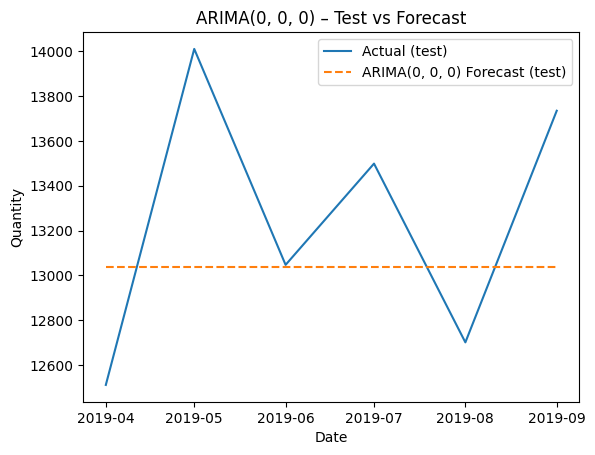

In [161]:
train = series[:-6]
test  = series[-6:]

plt.figure()
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.axvline(train.index[-1], color='red', linestyle='--', label='Train/Test split')
plt.title("Train / Test Split")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

arima_model = ARIMA(train, order=auto_model.order)
arima_fit = arima_model.fit()

print(arima_fit.summary())


test_forecast = arima_fit.forecast(steps=6)

mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))
print(f"\nTest MAE:  {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

plt.figure()
plt.plot(test.index, test, label='Actual (test)')
plt.plot(test_forecast.index, test_forecast, label=f'ARIMA{auto_model.order} Forecast (test)', linestyle='--')
plt.title(f"ARIMA{auto_model.order} – Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()


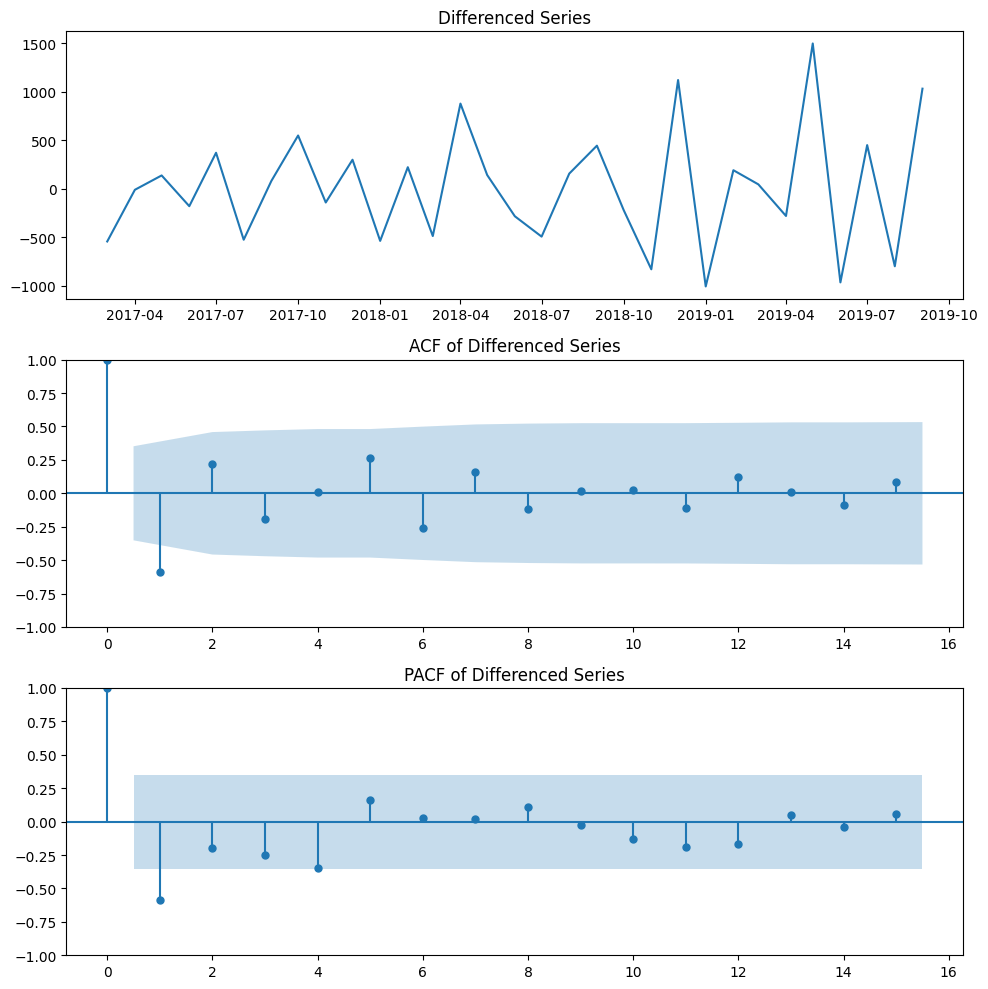

In [162]:
diff_series = series.diff().dropna()

fig, axes = plt.subplots(3, 1, figsize=(10, 10))

axes[0].plot(diff_series)
axes[0].set_title('Differenced Series')

plot_acf(diff_series, ax=axes[1])
axes[1].set_title('ACF of Differenced Series')

plot_pacf(diff_series, ax=axes[2])
axes[2].set_title('PACF of Differenced Series')

plt.tight_layout()
plt.show()



=== Final ARIMA(0, 0, 0) on full series_model ===


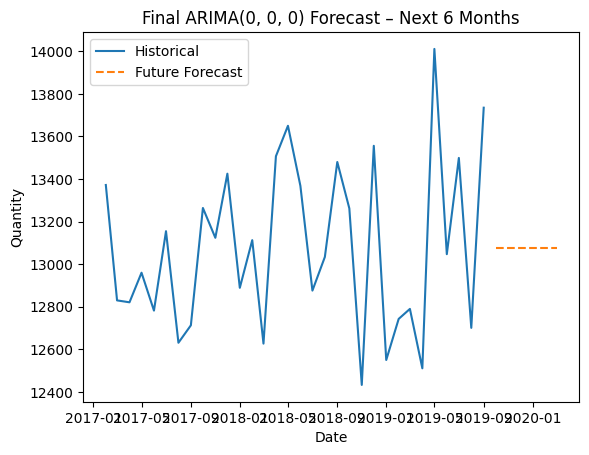


Future 6-month forecast:
2019-10-01    13076.843369
2019-11-01    13076.843369
2019-12-01    13076.843369
2020-01-01    13076.843369
2020-02-01    13076.843369
2020-03-01    13076.843369
Freq: MS, Name: predicted_mean, dtype: float64


In [163]:
print(f"\n=== Final ARIMA{auto_model.order} on full series_model ===")

final_model = ARIMA(series, order=auto_model.order)
final_fit = final_model.fit()

future_steps = 6   # forecast next 6 months
future_forecast = final_fit.forecast(steps=future_steps)

plt.figure()
plt.plot(series, label='Historical')
plt.plot(future_forecast.index, future_forecast, label='Future Forecast', linestyle='--')
plt.title(f"Final ARIMA{auto_model.order} Forecast – Next {future_steps} Months")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()

print("\nFuture 6-month forecast:")
print(future_forecast)


Metrics model on TRAIN only

=== Test metrics ===
MAE : 486.01
RMSE: 561.70
MAPE: 3.73%


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


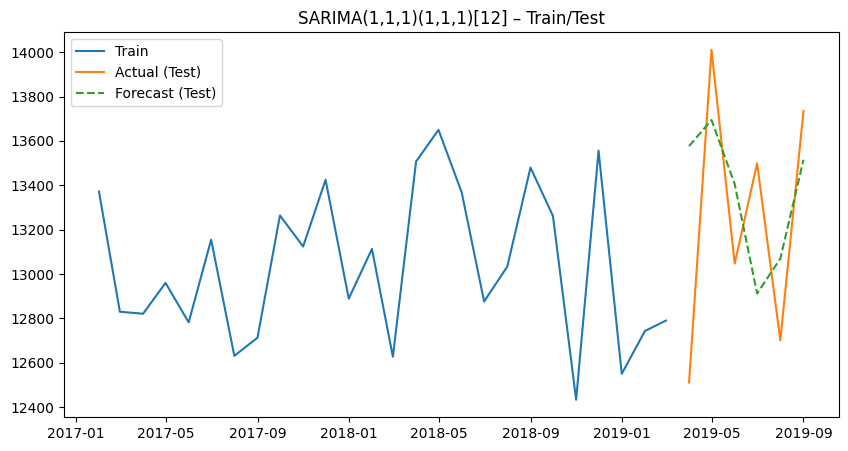

In [164]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ---- Train / test split ----
horizon = 6   # last 6 months as test
train = series[:-horizon]
test  = series[-horizon:]

forced_order = (1, 1, 1)
forced_seasonal_order = (1, 1, 1, 12)

print("Metrics model on TRAIN only")

metrics_model = SARIMAX(
    train,
    order=forced_order,
    seasonal_order=forced_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

metrics_fit = metrics_model.fit()

# Forecast into the test window
test_forecast = metrics_fit.forecast(steps=horizon)
test_forecast.index = test.index   # align indexes

# Metrics
mae  = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))
mape = np.mean(np.abs((test - test_forecast) / test)) * 100

print("\n=== Test metrics ===")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
#plot
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual (Test)")
plt.plot(test_forecast.index, test_forecast, '--', label="Forecast (Test)")
plt.title("SARIMA(1,1,1)(1,1,1)[12] – Train/Test")
plt.legend()
plt.show()

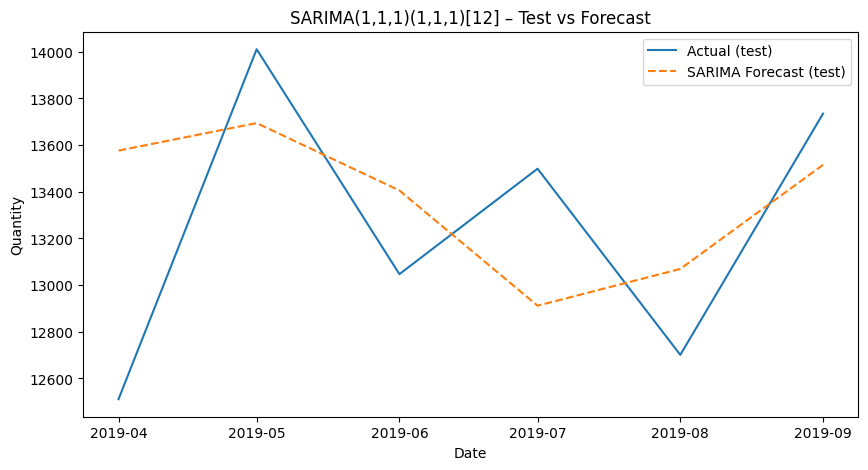

In [165]:
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual (test)')
plt.plot(test_forecast.index, test_forecast, '--', label='SARIMA Forecast (test)')

plt.title("SARIMA(1,1,1)(1,1,1)[12] – Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.legend()
plt.show()


Using forced SARIMA model: (1, 1, 1) (1, 1, 1, 12)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


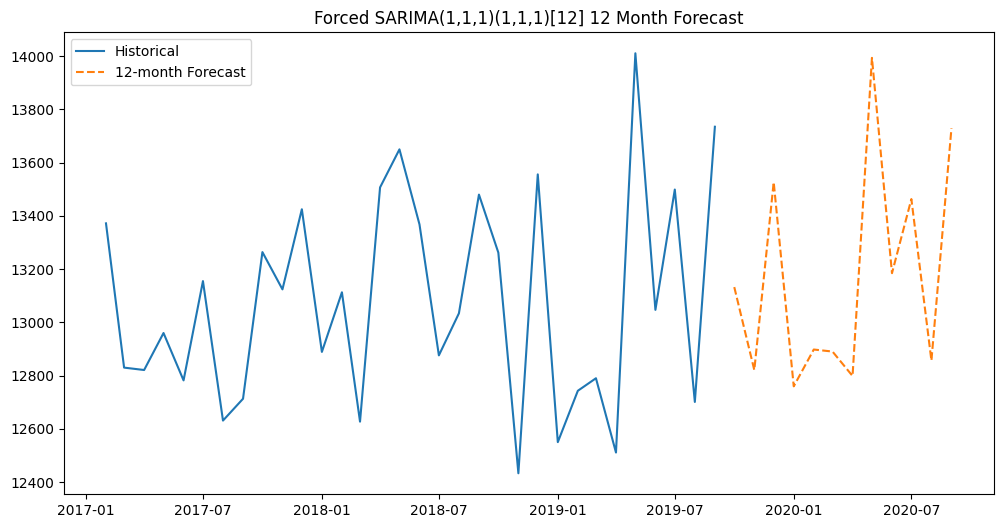

2019-10-01    13132.555912
2019-11-01    12820.683422
2019-12-01    13526.976569
2020-01-01    12759.668394
2020-02-01    12897.964248
2020-03-01    12890.337015
2020-04-01    12798.485529
2020-05-01    13993.735830
2020-06-01    13184.738819
2020-07-01    13463.285330
2020-08-01    12856.273135
2020-09-01    13729.143552
Freq: MS, Name: predicted_mean, dtype: float64


In [166]:

train = series[:-6]
test  = series[-6:]
forced_order = (1,1,1)
forced_seasonal_order = (1,1,1,12)

print("Using forced SARIMA model:", forced_order, forced_seasonal_order)

sarima_model = SARIMAX(
    series,
    order=forced_order,
    seasonal_order=forced_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima_model.fit()

future_steps = 12
future_forecast = sarima_fit.forecast(steps=future_steps)

plt.figure(figsize=(12,6))
plt.plot(series, label='Historical')
plt.plot(future_forecast.index, future_forecast, '--', label='12-month Forecast')
plt.title("Forced SARIMA(1,1,1)(1,1,1)[12] 12 Month Forecast")
plt.legend()
plt.show()

print(future_forecast)